# Exercise 04 : Histogram

## Import

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Connect to database

In [2]:
db_connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## Get all commit datetimes from `checker` table

In [3]:
sql_query = """
SELECT
    timestamp as datetime
FROM
    checker
WHERE
    uid LIKE 'user_%'
"""

commits_datetimes_df = pd.read_sql(sql=sql_query, con=db_connect, parse_dates=['datetime'])
commits_datetimes_df['date'] = commits_datetimes_df.datetime.dt.date
commits_datetimes_df['hour'] = commits_datetimes_df.datetime.dt.hour
commits_datetimes_df.head()

,datetime,date,hour
0,2020-04-17 05:19:02.744528,2020-04-17,5
1,2020-04-17 05:22:35.249331,2020-04-17,5
2,2020-04-17 05:22:45.549397,2020-04-17,5
3,2020-04-17 05:34:14.691200,2020-04-17,5
4,2020-04-17 05:34:24.422370,2020-04-17,5


In [4]:
commits_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
 1   date      3207 non-null   object        
 2   hour      3207 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 75.3+ KB


## Get day type (weekend or working day)

In [5]:
commits_datetimes_df['date'] = commits_datetimes_df.datetime.dt.date
commits_datetimes_df['hour'] = commits_datetimes_df.datetime.dt.hour
commits_datetimes_df['daytype'] = commits_datetimes_df['datetime'].dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
commits_datetimes_df.head()

,datetime,date,hour,daytype
0,2020-04-17 05:19:02.744528,2020-04-17,5,working_day
1,2020-04-17 05:22:35.249331,2020-04-17,5,working_day
2,2020-04-17 05:22:45.549397,2020-04-17,5,working_day
3,2020-04-17 05:34:14.691200,2020-04-17,5,working_day
4,2020-04-17 05:34:24.422370,2020-04-17,5,working_day


In [6]:
commits_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
 1   date      3207 non-null   object        
 2   hour      3207 non-null   int64         
 3   daytype   3207 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 100.3+ KB


## Create a graph

In [7]:
data = [commits_datetimes_df[commits_datetimes_df['daytype'] == 'working_day']['hour'].tolist(),
        commits_datetimes_df[commits_datetimes_df['daytype'] == 'weekend']['hour'].tolist()]

[]

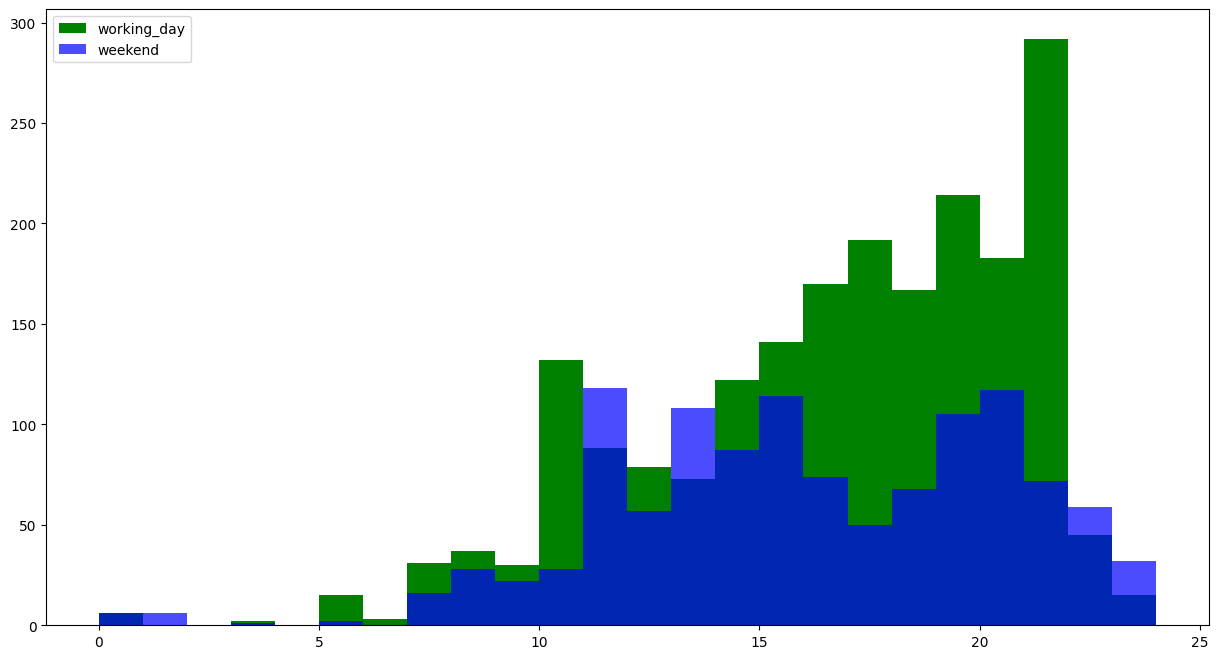

In [8]:
plt.figure(figsize=(15,8))
plt.hist(x=data[0], bins=range(0, 25), range=[0, 24], color='green')
plt.hist(x=data[1], bins=range(0, 25), range=[0, 24], alpha=0.7, color='blue')

plt.legend(['working_day', 'weekend'])
plt.plot()

## Are there hours when the total number of commits was higher on weekends than on working days?

In [9]:
commits_groupped = commits_datetimes_df.groupby(['daytype', 'hour']).count()['datetime'].reset_index()
pivot_table = pd.pivot_table(commits_groupped, values='datetime', index='hour', columns='daytype')
pivot_table.dropna(inplace=True)
pivot_table['delta'] = pivot_table['weekend'] - pivot_table['working_day']
pivot_table[pivot_table['delta'] > 0]

daytype,weekend,working_day,delta
hour,,,
11,118.0,88.0,30.0
13,108.0,73.0,35.0
22,59.0,45.0,14.0
23,32.0,15.0,17.0


### Answer: 11, 13, 22, 23